<a href="https://colab.research.google.com/github/kanakhan/GMSW/blob/main/%ED%95%9C%EA%B8%80%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D(%EC%88%98%EC%97%85).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한국어 감성분석

#### 1. 분석할 텍스트 수집하기

In [5]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [6]:
def get_movie_reviews(mcode,  page_num=10):

  # 크롤링할 변수를 가진 데이터프레임 생성
  m_review_df = pd.DataFrame(columns=("Title", "Score","Review"))
  idx = 0

  # 태그를 활용한 데이터 크롤링 
  for p in range(1, page_num+1):
    url = "https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=" \
    + str(mcode) + "&target=&page=" + str(p)
    print(url)
    m_page = requests.get(url)
    m_soup = BeautifulSoup(m_page.text, "html.parser")
    reviews = m_soup.find_all('td', {'class': 'title'})
    for review in reviews:
      title = review.find('a', {'class' : 'movie color_b'}).get_text()
      score = review.find('em').get_text()
      review_text = review.find('a', {'class': 'report'}).get('onclick').split(',')[2]
      m_review_df.loc[idx] = [title, score, review_text]
      idx += 1
      print("#", end="")
    page_num += 1
    
   # 페이지가 없을 때 에러처리
    try:
      url = "https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=" \
      + str(mcode) + "&target=&page" + str(page_num)
    except:
      break
  return m_review_df

In [7]:
m_review_df = get_movie_reviews(195758, 5)


https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=195758&target=&page=1
##########https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=195758&target=&page=2
##########https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=195758&target=&page=3
##########https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=195758&target=&page=4
##########https://movie.naver.com/movie/point/af/list.naver?st=mcode&sword=195758&target=&page=5
##########

In [8]:
m_review_df.head()

,Title,Score,Review
0,헌트,10,'역사적사실을 근거로 스토리 좋은 잘 만든 수작이다 배우들의 연기도 좋았고 간전의...
1,헌트,8,'두 남자가 가고 싶었던 서로 다른 신세계.'
2,헌트,10,'진짜 감독상 받을만하다. 연기 구멍이 없고 연출도 좋고 고증도 훌륭함. 단역들이...
3,헌트,8,'흔한 폭력 영화가 아닌 개념있는 영화에서 정우성 이정재 두배우의 진정성 있는 ...
4,헌트,1,'연기랑 캐스팅은 호화인데... '


In [9]:
reviews = m_review_df.Review

In [10]:
reviews[:10]

0     '역사적사실을 근거로 스토리 좋은 잘 만든 수작이다 배우들의 연기도 좋았고 간전의...
1                            '두 남자가 가고 싶었던 서로 다른 신세계.'
2     '진짜 감독상 받을만하다. 연기 구멍이 없고 연출도 좋고 고증도 훌륭함. 단역들이...
3     '흔한 폭력 영화가 아닌 개념있는 영화에서 정우성  이정재 두배우의 진정성 있는 ...
4                                  '연기랑 캐스팅은 호화인데... '
5     '넷플릭스로 보면서 볼륨 높였다가 와이프가 소리 줄이래서 줄여서 보다가 대사 안들...
6     '고문기술자. 이근안을 모티브로 했겠죠? 그 역할 하신 분 고생 많으셨네요. 이정...
7                                                   ''
8                                      '듣던대로 기대이상이었다.'
9                            '재밌네요 그당시 전두환이 죽었더라면...?'
Name: Review, dtype: object

#### 2. 형태소 분석

In [11]:
# 한글 자연어 처리기 설치
!pip install konlpy    
      

# 한글 형태소 분석기인 Mecab 설치
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [12]:
from konlpy.tag import Mecab

mecab = Mecab()

tokens = [mecab.morphs(word) for word in reviews]

tokens = list(map(lambda x : " ".join(x), tokens))

tokens[:10]

["' 역사 적 사실 을 근거 로 스토리 좋 은 잘 만든 수작 이 다 배우 들 의 연기 도 좋 았 고 간전 의 반전 좋 은 영화 강추 '",
 "' 두 남자 가 가 고 싶 었 던 서로 다른 신세계 . '",
 "' 진짜 감독 상 받 을 만 하 다 . 연기 구멍 이 없 고 연출 도 좋 고 고증 도 훌륭 함 . 단역 들 이 다 대 배우 들 이 라서 누가 중요 한 인물 일지 가늠 이 안 되 서 더 흥미진진 함 ! ! 신세계 st . 안기부 '",
 "' 흔한 폭력 영화 가 아닌 개념 있 는 영화 에서 정우성 이정재 두 배우 의 진정 성 있 는 연기 가 아주 좋 았 어요 . '",
 "' 연기 랑 캐스팅 은 호화 인데 . .. '",
 "' 넷플릭스 로 보 면서 볼륨 높였 다가 와이프 가 소리 줄이 래서 줄여서 보 다가 대사 안 들려서 뒤 로 건너뛰 기 볼륨 업 재생 반복 혼자 조용히 다시 봐야 겠 어요 ^^'",
 "' 고 문 기술자 . 이근안 을 모티브 로 했 겠 죠 ? 그 역할 하 신 분 고생 많 으셨 네요 . 이정재 가 뚜 까 팰 때 진짜 통 괘 하 더라 . 대신 맞 아 주 셔서 감사 합니다 . '",
 "''",
 "' 듣 던 대로 기대 이상 이 었 다 . '",
 "' 재밌 네요 그 당시 전두환 이 죽 었 더라면 . ..?'"]

### 3. 사전 업로드(KNU 한국어 감성사전)

* 감성사전 데이터프레임으로 만들기

In [13]:
import json
import pandas as pd

with open('SentiWord_info.json', encoding='utf-8-sig', mode='r') as f:
  SentiWord_info = json.load(f)

sentiword_dic = pd.DataFrame(SentiWord_info)


#### 분석할 문장에 포함된 단어와 감성 사전을 비교해 극성 값 계산

In [14]:
import pandas as pd

df = pd.DataFrame(columns=("review", "sentiment"))
idx = 0
 
for token in tokens:
  sentiment = 0
  for i in range(0, len(sentiword_dic)):
    if sentiword_dic.word[i] in token:
      sentiment += int(sentiword_dic.polarity[i])
  df.loc[idx] = [token, sentiment]
  idx += 1


In [11]:
df

,review,sentiment
0,' 진짜 감독 상 받 을 만 하 다 . 연기 구멍 이 없 고 연출 도 좋 고 고증 ...,-1
1,' 흔한 폭력 영화 가 아닌 개념 있 는 영화 에서 정우성 이정재 두 배우 의 진정...,-3
2,' 연기 랑 캐스팅 은 호화 인데 . .. ',-2
3,' 넷플릭스 로 보 면서 볼륨 높였 다가 와이프 가 소리 줄이 래서 줄여서 보 다가...,1
4,' 고 문 기술자 . 이근안 을 모티브 로 했 겠 죠 ? 그 역할 하 신 분 고생 ...,3
5,'',0
6,' 듣 던 대로 기대 이상 이 었 다 . ',1
7,' 재밌 네요 그 당시 전두환 이 죽 었 더라면 . ..?',0
8,' 스토리 가 재미없 어요 . ',2
9,' 긴장감 넘치 고 진행 이 빨라서 만족 스러웠 음 ',2


## 감성단어별로 워드클라우드 그리기

* 단어별로 토큰화

In [15]:
tokenized_tex = [mecab.morphs(token) for token in tokens]
#total_tokens = [toekn for doc in word for word in mecab.morphs(token) for if len(word)>1]
total_tokens = [token for word in tokenized_tex for token in word if len(token) > 1 ]

* Counter() 함수를 이용해 단어 빈도수 계산

In [16]:
from collections import Counter
token_counter = Counter(total_tokens)
noun_list = token_counter.most_common(50)
count_tokens=pd.DataFrame(dict(token_counter).items(),columns=['word','count'])

In [18]:
count_tokens.head()

,word,count
0,진짜,5
1,감독,5
2,연기,7
3,구멍,1
4,연출,4


* 토큰화된 단어와 감성사전 속 단어 매칭(merge)

In [17]:
sentword_df = pd.merge(left=sentiword_dic, right=count_tokens, how='inner',on='word')

In [18]:
sentword_df.head()

,word,word_root,polarity,count
0,감사,감사,2,1
1,강추,강추,2,1
2,기대,기대,1,2
3,능력,능력,1,1
4,만족,만족,2,1


* 감성어 사전과 매칭된 단어별로 극성을 정수타입으로 바꿔서 긍정, 중립, 부정으로 범주화

In [19]:
# 감성어 극성( -2,-1,0,1,2 ) 정수타입으로 바꾸기 
sentword_df['polarity'] = sentword_df['polarity'].astype(int)

# 긍, 부정 라벨링
sentword_df['senti_cat'] = list(map(lambda x:'긍정' if  x> 0 else '부정' if x < 0 else '중립', sentword_df.polarity))



In [20]:
sentword_df.head()

,word,word_root,polarity,count,senti_cat
0,감사,감사,2,1,긍정
1,강추,강추,2,1,긍정
2,기대,기대,1,2,긍정
3,능력,능력,1,1,긍정
4,만족,만족,2,1,긍정


##### 한글워드클라우드를 위해 한글 폰트 설치

In [1]:
!apt -qq -y install fonts-nanum 


fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 높은 해상도로 폰트 주변이 흐릿하게 보이는 것을 방지
%config InlineBamkend.figure_format = 'retina'

# matplotlib가 사용하는 폰트 경로 확인
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'

# 폰트 경로를 전달해 폰트이름을 가져옴
font_name = fm.FontProperties(fname=fontpath, size=10).get_name() 

# matplotlib가 사용할 글꼴을 나눔바른고딕으로 변경
plt.rc('font', family=font_name)

# 폰트 매니저 리빌딩
fm._rebuild()


##### 워드클라우드 그리기(긍정과 부정을 구분)

In [22]:
!pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(-0.5, 799.5, 399.5, -0.5)

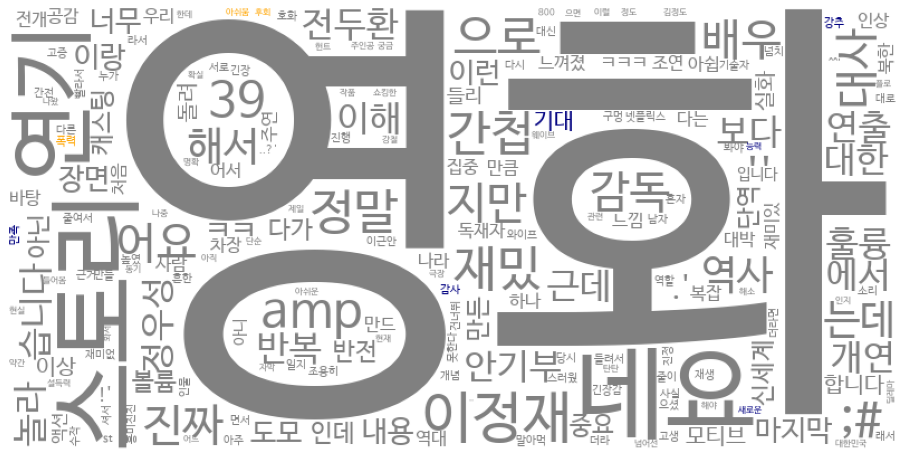

In [23]:
class SimpleGroupedColorFunc(object):
    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)
    
color_to_words = {
    'orange' : list(sentword_df.loc[sentword_df.senti_cat == '부정', 'word']),
    'navy': list(sentword_df.loc[sentword_df.senti_cat == '긍정', 'word'])
}
default_color = 'grey'


import matplotlib.pyplot as plt
from wordcloud import WordCloud

simple_color_func = SimpleGroupedColorFunc(color_to_words, default_color)
wc = WordCloud(font_path='./font/NanumBarunGothic.ttf', scale=2.0, max_font_size=250, color_func = simple_color_func,
               background_color="white").generate_from_frequencies(token_counter)
plt.figure(figsize = (16,  16))
plt.imshow(wc)
plt.axis("off")